In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
tf.random.set_seed(0)
np.random.seed(0)

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = to_categorical(y)

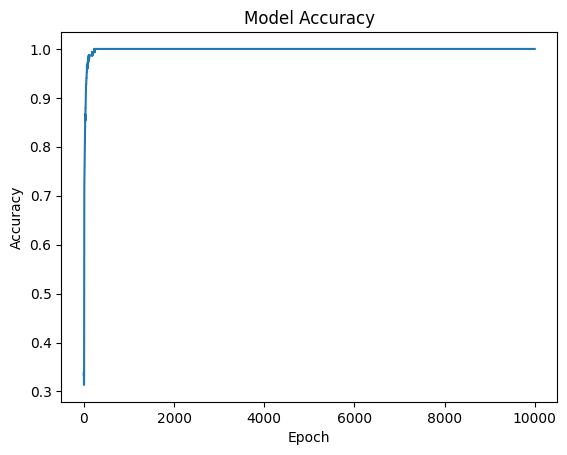

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 1ms/step - loss:

In [3]:
model = Sequential([
    Dense(4, input_shape=(4,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))

history = model.fit(X_scaled, y, epochs=10000, verbose=0)

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

network_description = "\n".join(model_summary)
print(network_description)

accuracy = model.evaluate(X_scaled, y)[1]
print("Accuracy:", accuracy)
